In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import curve_fit
from scipy.io import wavfile
from scipy.signal import find_peaks


# Elektromechanikus oszcillátorok

Az oszcillátor az alábbi képen látható.
<img src="supplementary/emo.png" alt="emo">

Tanulmányozza az áramkör felépítését a kapcsolási rajz és a nyákrajz alapján. 
A mérési feladatokat a kivezetett mérőpontokon végezze! **Figyelem**: a $K_1$ kapcsoló három állású kapcsoló, a középső állás a kikapcsolt állapotnak felel meg!

## 1. Feladatok a blocking oszcillátoros rendszer vizsgálatára

### 1.1. A gerjesztő jel vizsgálata - 4 pont

A rendszert a blocking oszcillátoros üzemmódban (a $K_1$ kapcsoló az A állásban) működtetve végezze el az alábbi méréseket! 
Először válassza le a tápegységet, és a forgót kézzel óvatosan hajtva, az oszcilloszkóp segítségével mérje meg a blocking áramkör tranzisztorának ($Tr_2$) bázisán létrejövő jelalakot. Az oszcilloszkóp `STOP` gombjával kimerevített adatsort le tudja a számítógépre tölteni.

- Készítse el a jelalak rajzát!
- Magyarázza meg, miért nem kap a mérési leírás 2. ábrája szerinti szimmetrikus hullámalakot.

<img src="ábra1feladat.png" alt="emo">

### 1.2. A blocking áramkör teljesítményfelvétele

Kösse be a tápegységet, és állítsa be a feszültséget 10 V-ra. 

#### 1.2.1. Rögzítse az $R_4$ kollektor ellenálláson keletkező jel alakját - 2 pont 

A rajzon jelölje be az alábbi táblázat paramétereit: 

- $u_1$, $u_2$ a trapéz alakú impulzus amplitúdói;
- $t$ az impulzus szélessége és $T$ az áramimpulzusok periódus ideje. 

<img src="2feladat.png" alt="emo">

<img src="kettokozti.png" alt="emo">

#### 1.2.2. Érdekes jellemzők meghatározása - 4 pont

Határozza meg az alábbi kifejezések képletét a fent bevezetett paraméterek ismeretében. Vezesse le ezek hibáját is!

- Az átlagáram képlete, $I=$
- A teljesítmény képlete, $P =$ 
- A szögsebesség képlete, $\omega= $ 


#### 1.2.3. Teljesítmény feszültségfüggése - 4 pont


Az $U$ tápfeszültséget a 6 és a 13 V közötti tartományban változtatva végezze el a mérés és töltse ki a táblázatot. Pótolja a mértékegységeket a táblázat fejlécében.

| Mérés száma     | $U$ [V] | $u_1$  [mV] |   $u_2$ [mV] | $t$ [ms] | $T$ [ms]  | $P$  [W] | $\omega$ [rad/s]  |
| :-------:       |-------------  | :--------:| :---:     | :---:  | :---:   | :---:   | :---:         |
|1. |13 |363.3 |1000|26 |488 |464.65 |25.75 |  
|2. |12 | 310 |903.3 | 26|510 |368.02 |24.64 |  
|3. |11 |260 |830 |26| 550|297.03 |22.85 |  
|4. | 10|246.6 |733.3 |25.8| 564|240.05 |22.28 |  
|5. |9 |216.6 |650 |25.8|602 | 187.75| 20.87|  
|6. |8 |216.6 |553.3     |25.8 |640 | 148.19| 19.63|  
|7. | 7|216.6 |553.3 |25.8 |712 |117.27 |17.64 |  
|8. |6 |136.6 |383.3 |25 |834 | 67.57|15.06 | 

Mivel nem tudtam az ellenállás ezért minden esetben 1 $\Omega$ nak vettem mert ahhoz a változását vizsgáljuk ahhoz tökéletes

Ábrázolja a szögsebességet a teljesítmény függvényében.

In [3]:
v = [13,12,11,10,9,6]
u1 = [363.3,310,260,246.6,216.6,136.6]
u2 = [1000,903.3,830,733.3,650,383.3]
T = [488,510,550,564,602,834]#értékek 13 v-től lefele

In [4]:
P = array((array(u2)+array(u1))/2)**2*0.001 #watt miatt
omega = (4*pi)/(array(T)*0.001) #rad/s miatt

In [5]:
P

array([464.6467225, 368.0242225, 297.025    , 240.0510025, 187.74889  ,
        67.5740025])

In [6]:
omega

array([25.75075946, 24.63994238, 22.84794657, 22.28079896, 20.87436979,
       15.06759066])

In [7]:
# adatrögzítés, ábrázolás és illesztés

In [8]:
def line(x,a,b):
    return a*x+b

In [9]:
def parabol(x,a,b,c):
    return a*x**2+b*x+c

In [10]:
popt, pcov = curve_fit(line,P,omega)
perr = sqrt(diag(pcov))

print(popt)
print(perr)

[ 0.02580715 14.9204982 ]
[0.00412804 1.23497084]


In [11]:
popt2, pcov2 = curve_fit(parabol,P,omega)
perr2 = sqrt(diag(pcov2))

print(popt2)
print(perr2)

[-5.84466513e-05  5.69920844e-02  1.17052160e+01]
[1.29054984e-05 7.09328946e-03 8.73803171e-01]


In [12]:
for item in popt2:
    print(round(item,5))

-6e-05
0.05699
11.70522


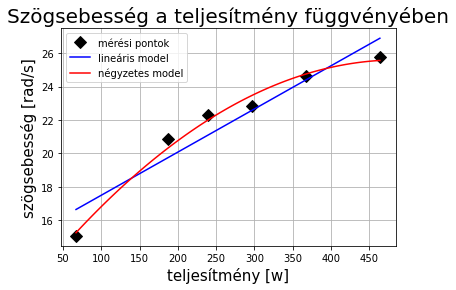

In [13]:
tforplot = np.linspace(67,464,100)
plot(P,omega, ls = " ", marker = "D", markersize = 9, color ="black", label = "mérési pontok")
plot(tforplot,line(tforplot,*popt), color="b", label = "lineáris model")
plot(tforplot,parabol(tforplot,*popt2), color = "r", label= "négyzetes model")
xlabel("teljesítmény [w]", size = 15)
ylabel("szögsebesség [rad/s]", size = 15)
title("Szögsebesség a teljesítmény függvényében", size = 20)
grid()
legend()

## 2. A fénykapus rendszer vizsgálata. 

A fénykapus rendszer működtetéséhez kapcsolja át a $K_1$ kapcsolót a panelon jelzett B állásba!

### 2.1. A vezérlés vizsgálata - 3 pont

Az ($U$) tápfeszültséget állítsa 10 V-ra, a $P_1$ trimmer-potenciómétert középállásba. Mérje meg oszcilloszkóp
segítségével 
- a fénykapu fotótranzisztorának ($Tr_1$) kollektori jelalakját, és 
- a vezérlő tranzisztor ($Tr_2$) bázisán létrejövő jelalakot. 

<img src="fenykapu.png" alt="emo">

A csitromsárga volt a fénykapu fototranzisztora, és a kék a vezérlő tranzisztor

### 2.2. A vezérlés hangolása - 4 pont

Változtassa a monostabil áramkör időzítését a $P_1$ trimmer-potencióméter segítségével, és közben figyelje a
vezérlő tranzisztor ($Tr_2$) bázisán keletkező jelalakok változását. *Figyelem,* a változtatás lassan
tükröződik a fordulatszámon. 

A táblázatba kerüljön be a $Tr_2$ bázisán mért impulzus szélesség ($t_\mathrm{vez}$, a monostabil időzítő billenési ideje), a $Tr_1$ kollektori jelét jellemőz ($t_\mathrm{opt}$) valamint a becsült szögsebesség.

**Figyelem!** Az elektromechanikus oszcillátor optikai kapujáról a jelalat a PC hangkártyájára is ki van vezetve. Az egyes mérések mellé rögzítse az adatokat hangfájlba, későbbi elemzés céljából.

| Mérés Száma | $t_\mathrm{vez}$ | $t_\mathrm{opt}$ | $\omega$ |
|:-----------:|:---------:|:----------:|:-------------:|
|      1.     |      13.3     |    14.5        |      29.9         |
|      2.     |     28.5      |      30.2      |        35.9       |
|      3.     |      27.9     |          29.4  |           37    |
|      4.     |       40.6    |        41.3    |          38     |
|      5.     |      48.6     |     50.4       |         37      |
|      6.     |     54.9      |       56.6     |      37  |

- Készítsen a mérésről ábrát!
- Mikor a leggyorsabban a forgás?

In [15]:
def approxomega(T):
    return 4*pi/T

In [16]:
dt = [0.42,0.35,0.34,0.33,0.34,0.34]
for item in dt:
    print(approxomega(item))

29.919930034188507
35.90391604102621
36.95991357164462
38.07991095260355
36.95991357164462
36.95991357164462


In [17]:
sample_rate1, audio_data1 = wavfile.read("elsomod.wav")
sample_rate2, audio_data2 = wavfile.read("masodmod.wav")
sample_rate3, audio_data3 = wavfile.read("harmadmod.wav")
sample_rate4, audio_data4 = wavfile.read("negyedmod.wav")
sample_rate5, audio_data5 = wavfile.read("otodmod.wav")
sample_rate6, audio_data6 = wavfile.read("harmadmod.wav")

Text(0.5, 1.0, 'Első módosítás')

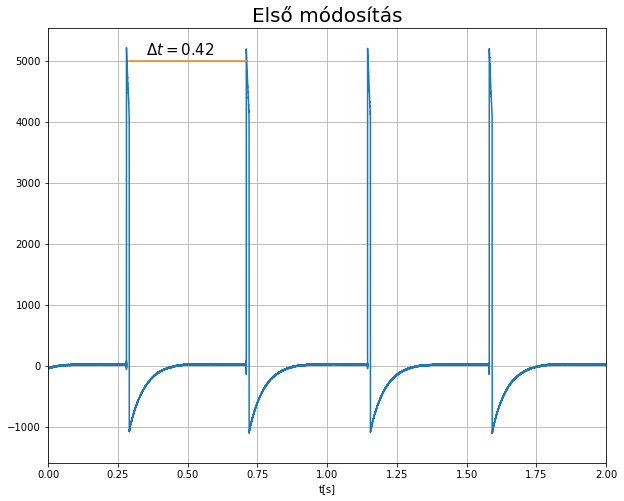

In [18]:
t1 = linspace(0,len(audio_data1[:,1])/sample_rate1,len(audio_data1[:,1]))
x1=[0.29,0.71]
y1=[5000,5000]
figsize(10,8)
plot(t1,audio_data1[:,1])
plot(x1,y1)
text(0.35,5100,r"$\Delta t = 0.42$", size= 15)
xlabel('t[s]')
grid()
xlim(0,2)
title("Első módosítás", size = 20)

Text(0.5, 1.0, 'Második módosítás')

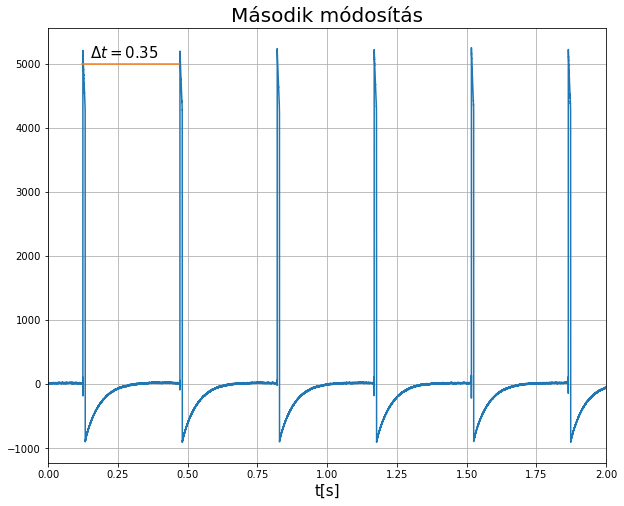

In [19]:
x2=[0.12,0.47]
y2=[5000,5000]
t2 = linspace(0,len(audio_data2[:,1])/sample_rate2,len(audio_data2[:,1]))
figsize(10,8)
text(0.15,5100,r"$\Delta t = 0.35$", size= 15)
plot(t2,audio_data2[:,1])
plot(x2,y2)
xlabel('t[s]', size = 15)
grid()
xlim(0,2)
title("Második módosítás", size = 20) 

Text(0.5, 1.0, 'Harmadik módosítás')

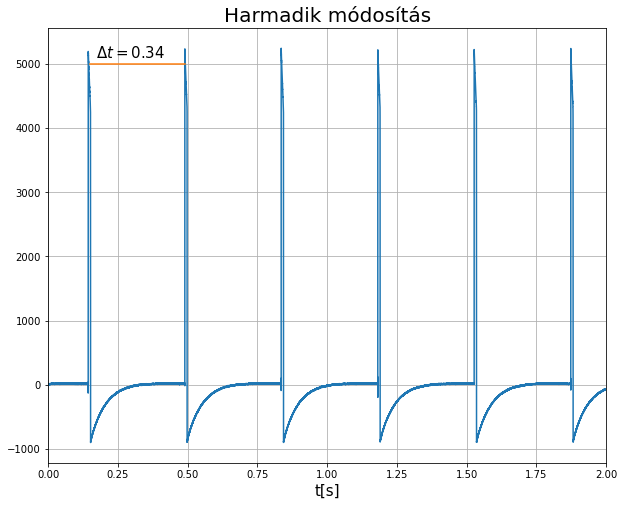

In [20]:
t3 = linspace(0,len(audio_data3[:,1])/sample_rate3,len(audio_data3[:,1]))
x3=[0.15,0.49]
y3=[5000,5000]
figsize(10,8)
plot(t3,audio_data3[:,1])
plot(x3,y3)
text(0.17,5100,r"$\Delta t = 0.34$", size= 15)
xlabel('t[s]',size = 15)
grid()
xlim(0,2)
title("Harmadik módosítás", size = 20)

Text(0.5, 1.0, 'Negyedik módosítás')

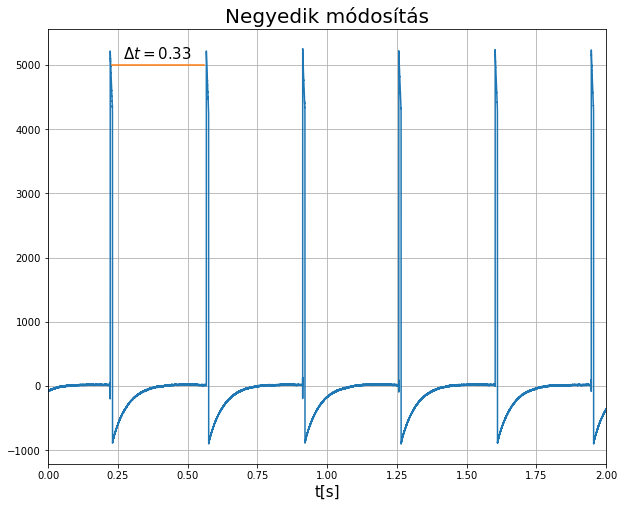

In [21]:
t4 = linspace(0,len(audio_data4[:,1])/sample_rate4,len(audio_data4[:,1]))
x4=[0.23,0.56]
y4=[5000,5000]
text(0.27,5100,r"$\Delta t = 0.33$", size= 15)
figsize(10,8)
plot(t4,audio_data4[:,1])
plot(x4,y4)
xlabel('t[s]', size = 15)
grid()
xlim(0,2)
title("Negyedik módosítás", size = 20)

Text(0.5, 1.0, 'Ötödik módosítás')

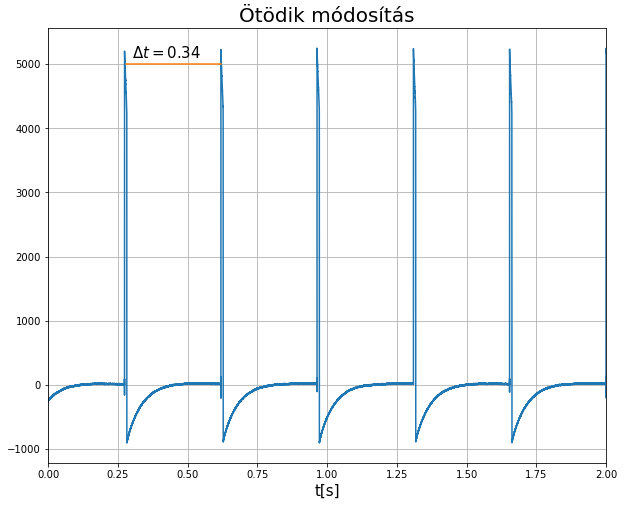

In [22]:
t5 = linspace(0,len(audio_data5[:,1])/sample_rate5,len(audio_data5[:,1]))
x5=[0.28,0.62]
y5=[5000,5000]
text(0.30,5100,r"$\Delta t = 0.34$", size= 15)
figsize(10,8)
plot(t5,audio_data5[:,1])
plot(x5,y5)
xlabel('t[s]', size = 15)
grid()
xlim(0,2)
title("Ötödik módosítás", size = 20)

Text(0.5, 1.0, 'Hatodik módosítás')

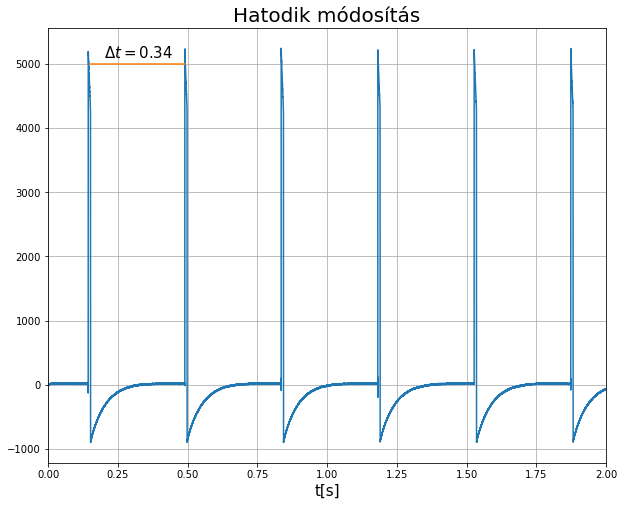

In [23]:
t6 = linspace(0,len(audio_data6[:,1])/sample_rate6,len(audio_data6[:,1]))
x6=[0.15,0.49]
y6=[5000,5000]
figsize(10,8)
plot(t6,audio_data6[:,1])
text(0.20,5100,r"$\Delta t = 0.34$", size= 15)
plot(x6,y6)
xlabel('t[s]', size = 15)
grid()
xlim(0,2)
title("Hatodik módosítás", size = 20)

Ezen kis "számolgatások" alapján a négyes módosítás volt a leggyorsabb frogás.

### 2.3. Szögsebesség program írása - 4 pont

A hangfájlban impulzusokat rögzítünk. Készítsen `python` eljárást, ami az egymás utáni impulzusokat megtalálja, és szögsebességet becsül.

Ábrázolja a korábbi mérés egyik felvételének időfejlődését. A grafikonra nagytva mit tapasztal? Magyarázza a tapasztaltakat!

In [24]:
hangok = [audio_data1,audio_data2,audio_data3,audio_data4,audio_data5,audio_data6]
samples = [sample_rate1,sample_rate2,sample_rate3,sample_rate4,sample_rate5,sample_rate6]

In [25]:
def omega_calc(hang,sample):
    peaks = find_peaks(hang[:,1], distance=100, height = 5000)[0]/sample #leosztottam, hogy időközt jelentse ne minta közt
    dT = []
    for i in range(len(peaks)-1):
        dT.append(peaks[i+1]-peaks[i])
    T = mean(dT)
    w = 4*pi/T
    return w

In [26]:
for i in range(len(hangok)):
    omega = omega_calc(hangok[i],samples[i])
    print("Módosítás sorszáma:",i+1,"omega = ",round(omega,2))

Módosítás sorszáma: 1 omega =  27.0
Módosítás sorszáma: 2 omega =  36.18
Módosítás sorszáma: 3 omega =  36.34
Módosítás sorszáma: 4 omega =  36.44
Módosítás sorszáma: 5 omega =  36.41
Módosítás sorszáma: 6 omega =  36.34


Beigazolódott, tényleg a 4. módosításhoz tartozó forgás szögsebessége volt a legnagyobb.

### 2.4. A be- és kikapcsolási jelenség - 4 pont

Állítsa meg a forgást. Az $U$ tápfeszültséget állítsa 10 V-ra, a $P_1$ trimmer-potenciómétert középállásba, majd
egy kis lökéssel idítsa újra a forgást. Mikor kellően felgyorsult, $K_1$ kapcsolót állítsa középállásba, ezzel
megszünteti a $Tr_2$ vezérlését. 

Mérés közben a rögzítse hangfájlba a $Tr_1$ kolletorkörében mérhető jelet. 

- Eljárására támaszkodva, készítse el a gyorsuló, az állandó és a lassuló szakaszt ábrázoló grafikont!
- Elemezze a fenti grafikont! Milyen arányban áll a gyorsulás a lassuláshoz képest?

In [27]:
sample_rate_folyamat, audio_data_folyamat = wavfile.read("folyamatabra.wav")

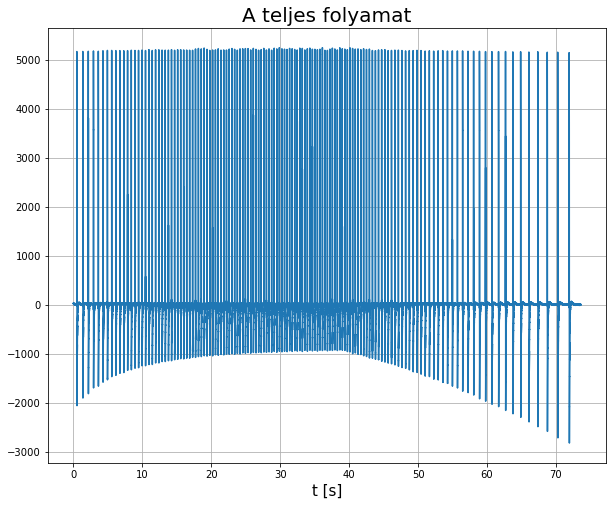

In [28]:
t_folaymat = linspace(0,len(audio_data_folyamat[:,1])/sample_rate_folyamat,len(audio_data_folyamat[:,1]))
plot(t_folaymat,audio_data_folyamat[:,1])
xlabel('t[s]')
grid()
title("A teljes folyamat", size = 20)
xlabel("t [s]", size = 15)
show()

In [34]:
peaks = find_peaks(audio_data_folyamat[:,1], distance=100, height = 5000)[0]/sample_rate_folyamat
dT = []
for i in range(len(peaks)-1):
    dT.append(peaks[i+1]-peaks[i])
    

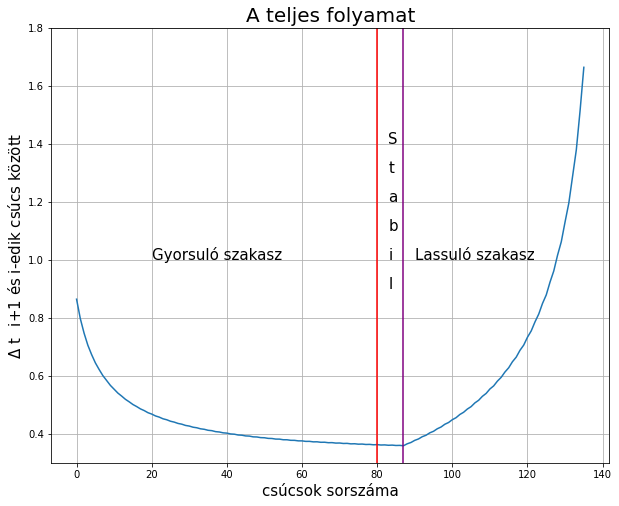

In [35]:
x1=[80,80]
y1 = [0,2]
x2 = [87,87]
plot(dT)
plot(x1,y1,color ="r")
plot(x2,y1,color ="purple")
text(20,1, "Gyorsuló szakasz", size =15)
text(90,1, "Lassuló szakasz", size =15)
xlabel("csúcsok sorszáma", size = 15)

text(83,1.4, "S", size =15)
text(83,1.3, "t", size =15)
text(83,1.2, "a", size =15)
text(83,1.1, "b", size =15)
text(83,1, "i", size =15)
text(83,0.9, "l", size =15)

ylabel(r"$\Delta$ t $\hspace{0.5}$i+1 és i-edik csúcs között", size = 15)
title("A teljes folyamat", size = 20)
ylim(0.3,1.8)
grid()

In [31]:
len(dT)

136

In [32]:
80/(136-87)

1.6326530612244898

In [33]:
136-87

49